In [28]:
# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
%store classes
inverted_classes = {v:k for k, v in classes.items()}
combined_dir = os.path.join("Combined")


Stored 'classes' (dict)


/Users/leon/anaconda3/envs/mlenv/lib/python3.11/site-packages/IPython/extensions/storemagic.py:229: UserWarning: This is now an optional IPython functionality, setting autorestore/classes requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj


In [29]:
##### X_TRAIN DATA

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

# print(f"X_train shape : {X_train.shape} \n", X_train, end="\n\n")
# print(f"Y_train shape: {y_train.shape} \n", y_train, end="\n\n")
#So, training data is collected for 126 observations, with 50 measurements(acc_x, acc_y, acc_z) per second for each observation candidate to maintain.
#Time Slice used for training points is: 100-600: for consistency in data, probably, amongst the observations recorded.
print(X_train.shape)

(126, 500, 3)


In [30]:
####TEST_DATA

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")
len_data = []

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        # print(f"last_row: {len(df)}", df.iloc[len(df)-1])
        # len_data.append((folder, file, len(df)))
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# print(len_data)
# print(f"X_test shape : {X_test.shape} \n", X_test, end="\n\n")
# print(f"Y_test shape: {y_test.shape} \n", y_test, end="\n\n")

#So, 54 testing data.


In [31]:
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

print(X.shape)
X_flattened = X.reshape(-1, 3)
X_df = pd.DataFrame(X_flattened)
X_df.columns = ["acc_x", "acc_y", "acc_z"]
# print(X_df.head)
y_df = pd.DataFrame(y, columns=["class_label"])
y_df["activity_name"] = y_df["class_label"].map(inverted_classes)
# print(y_df.head)
# split the data into training and testing sets. Change the seed value to obtain different random splits.
X_df.to_csv("X_Train_Test_data.csv", index=False)
y_df.to_csv("Y_train_test_data.csv", index=False)

seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

(180, 500, 3)
Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


[  2   8  22  24  29  30  32  49  50  59  60  61  62  67  76  84  91  95
 101 107 112]
Sample_Point: 54
6 Standing
6 Standing
6 Standing
6 Standing
6 Standing
6 Standing
6 Standing
6 Standing
6 Standing
6 Standing


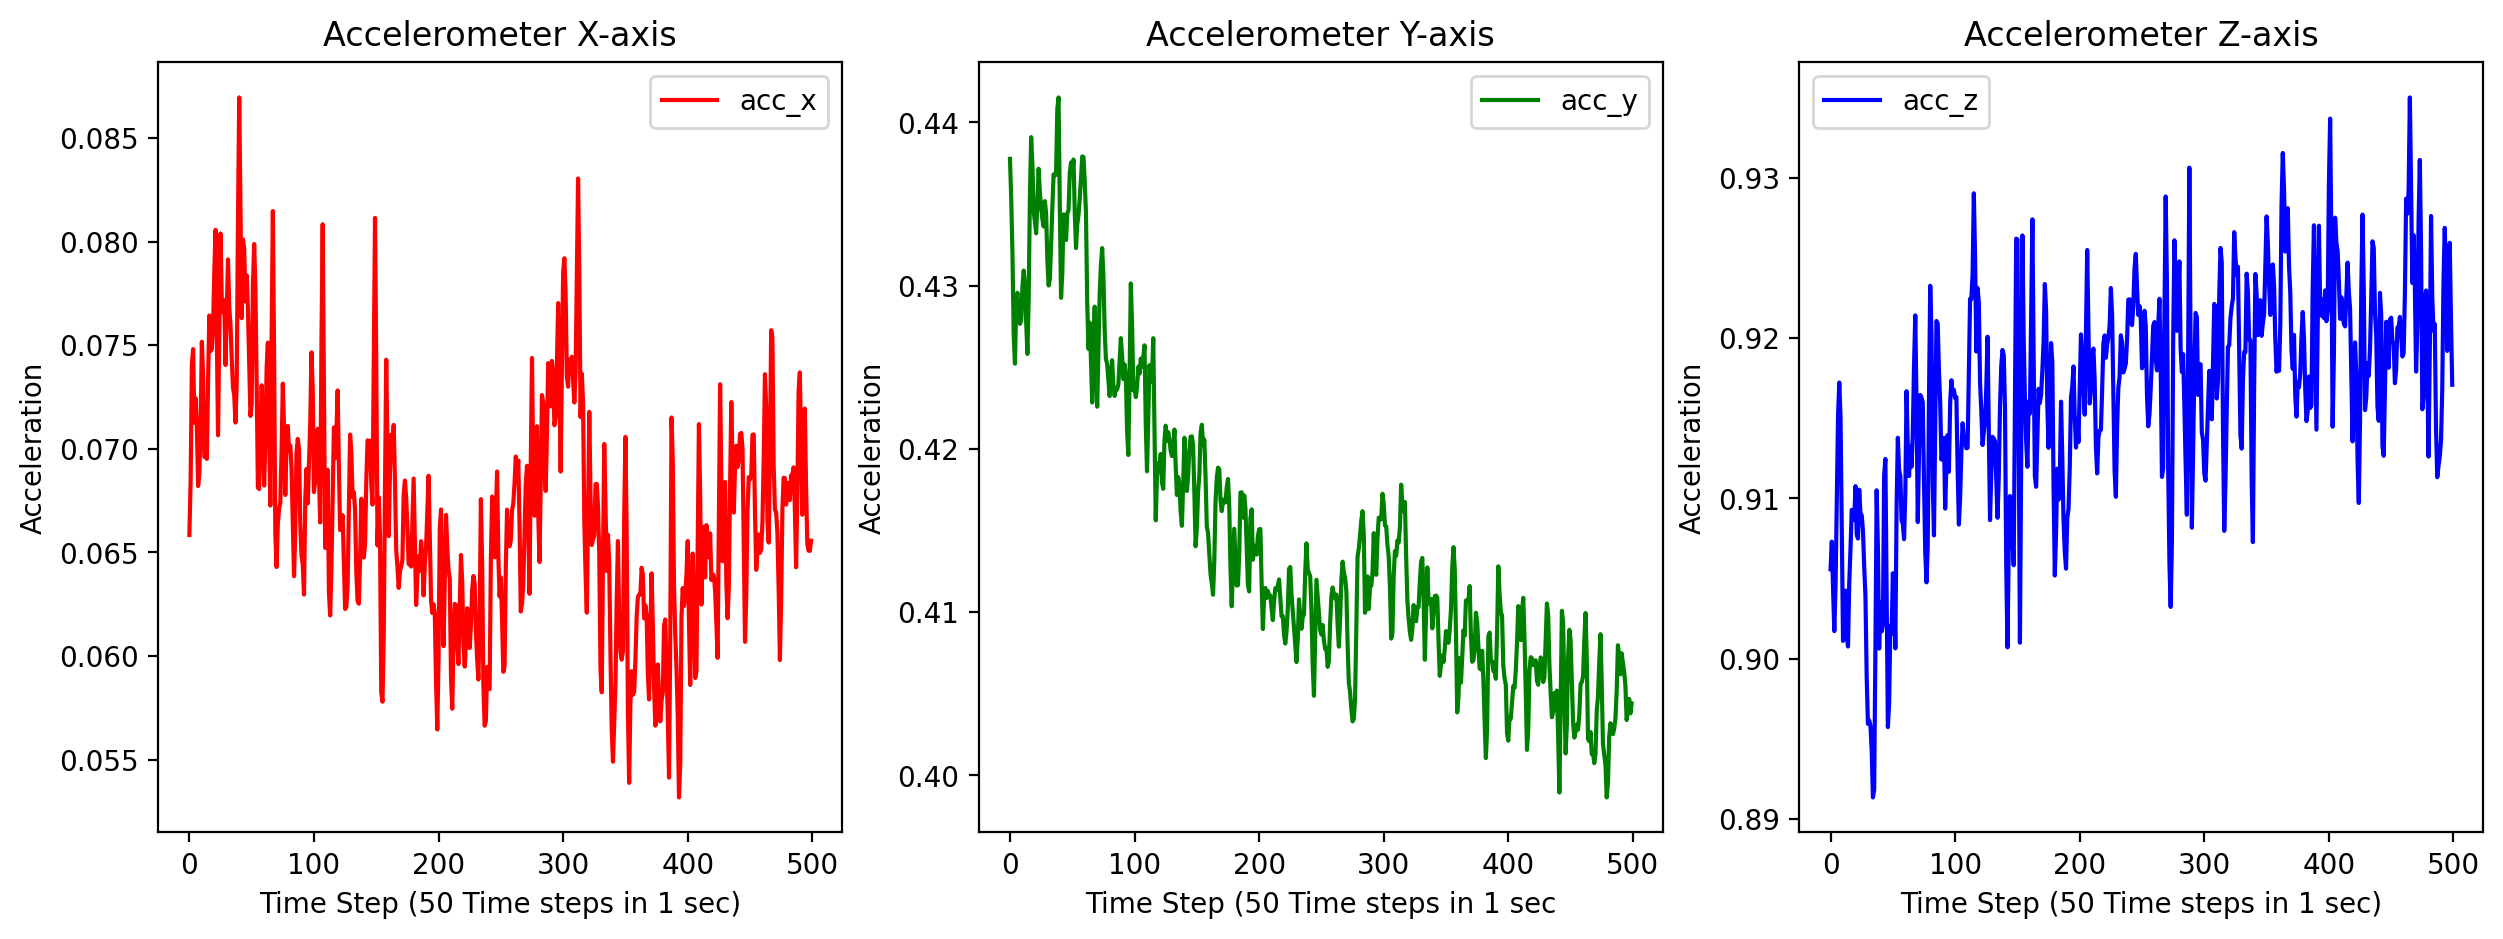

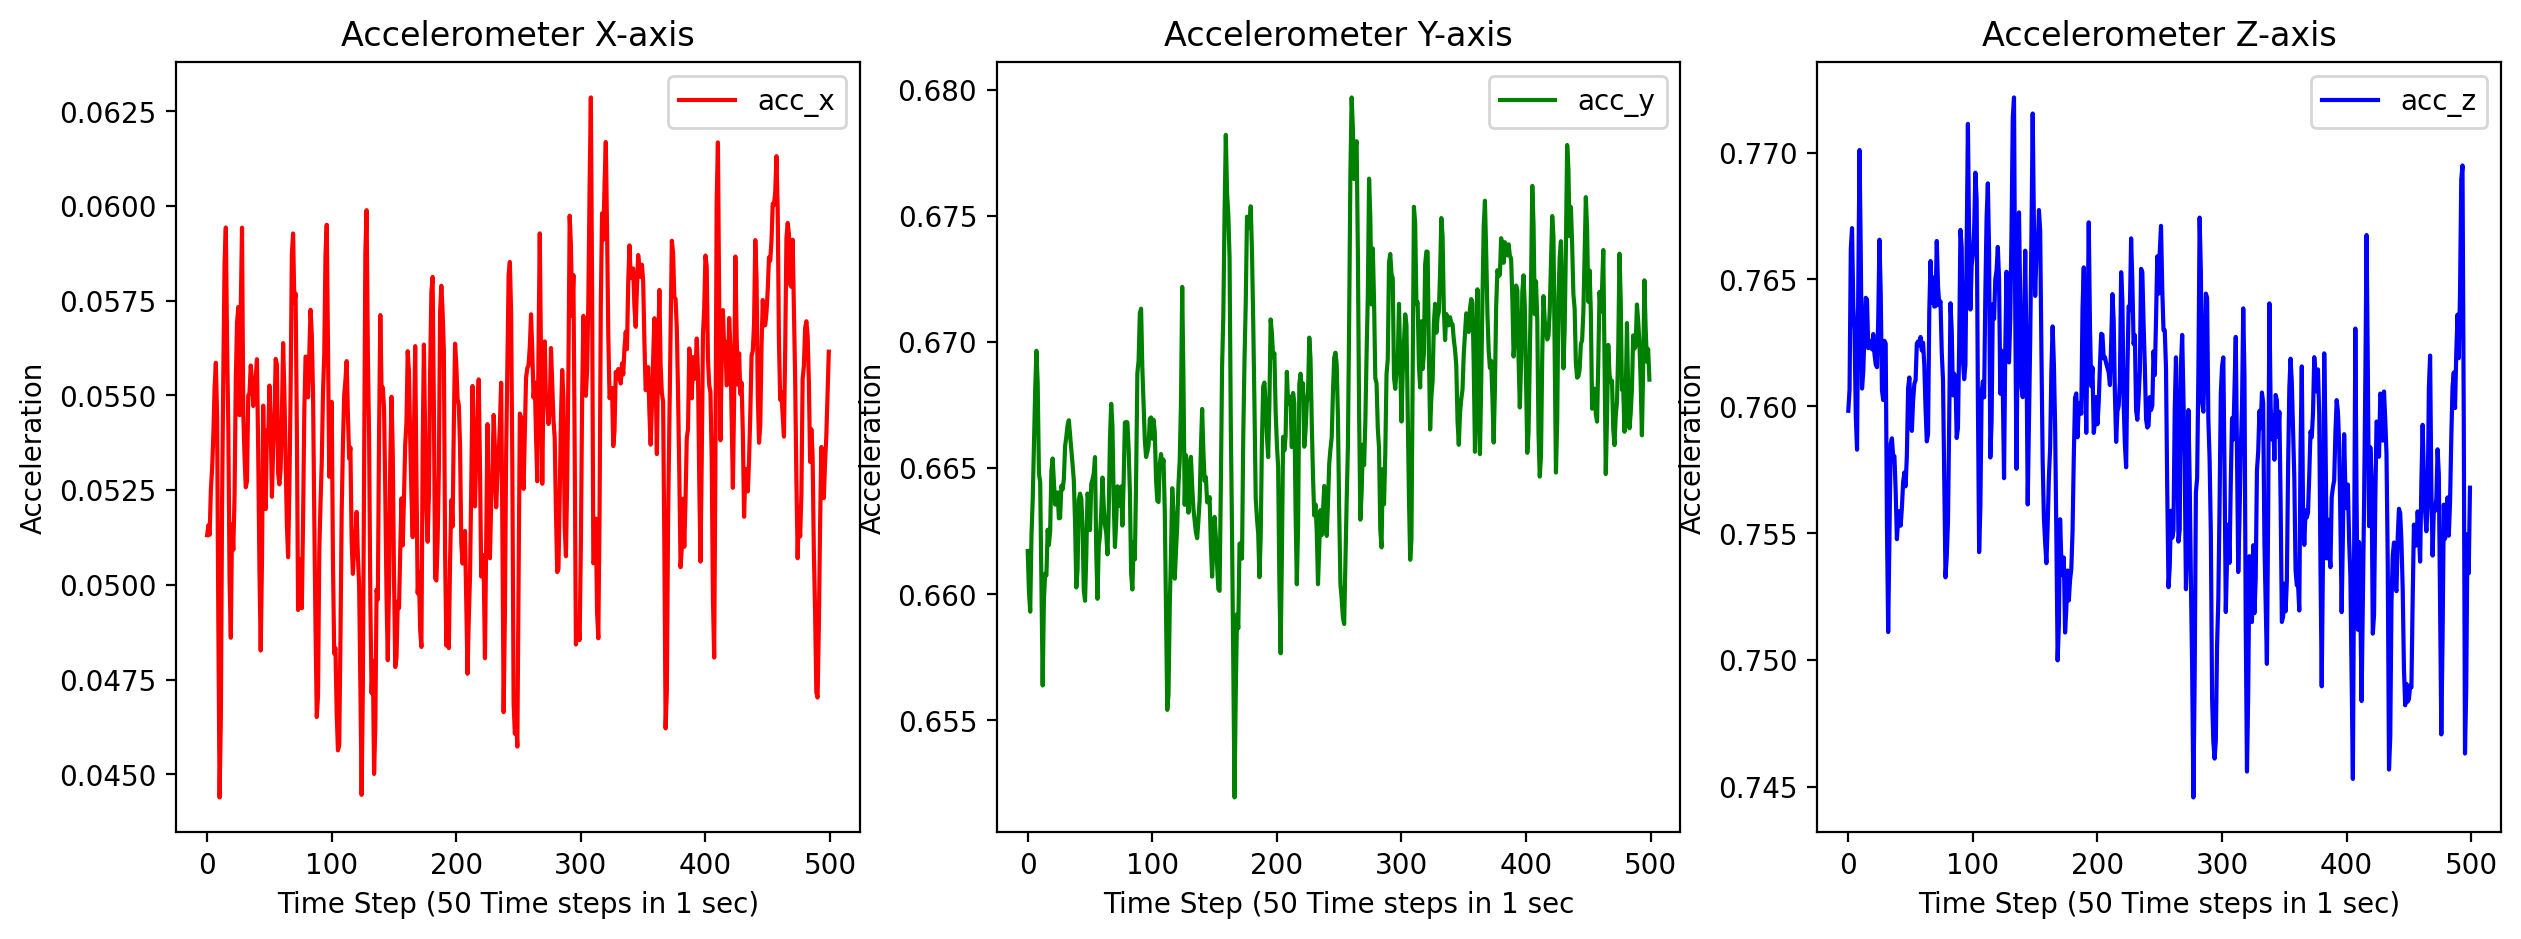

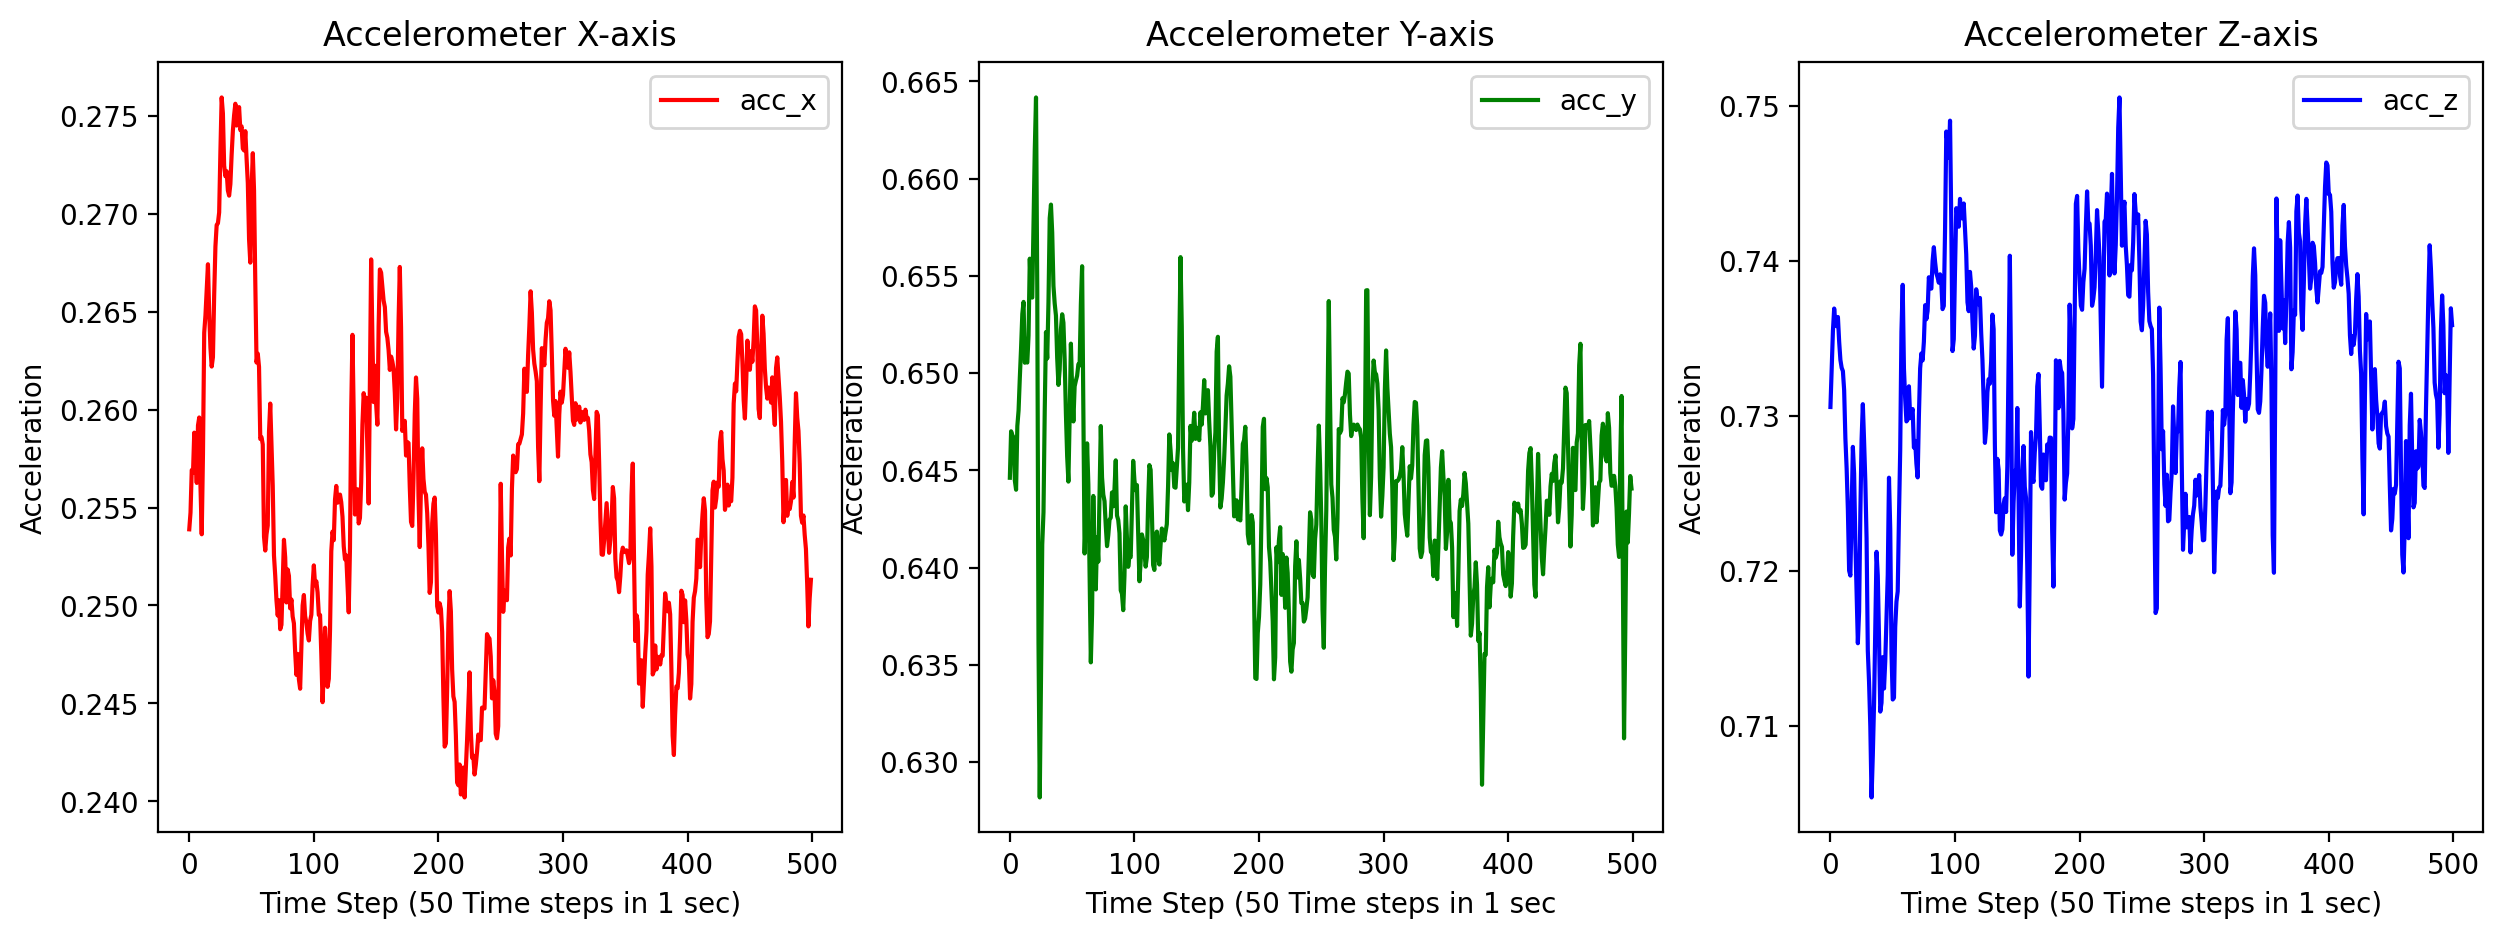

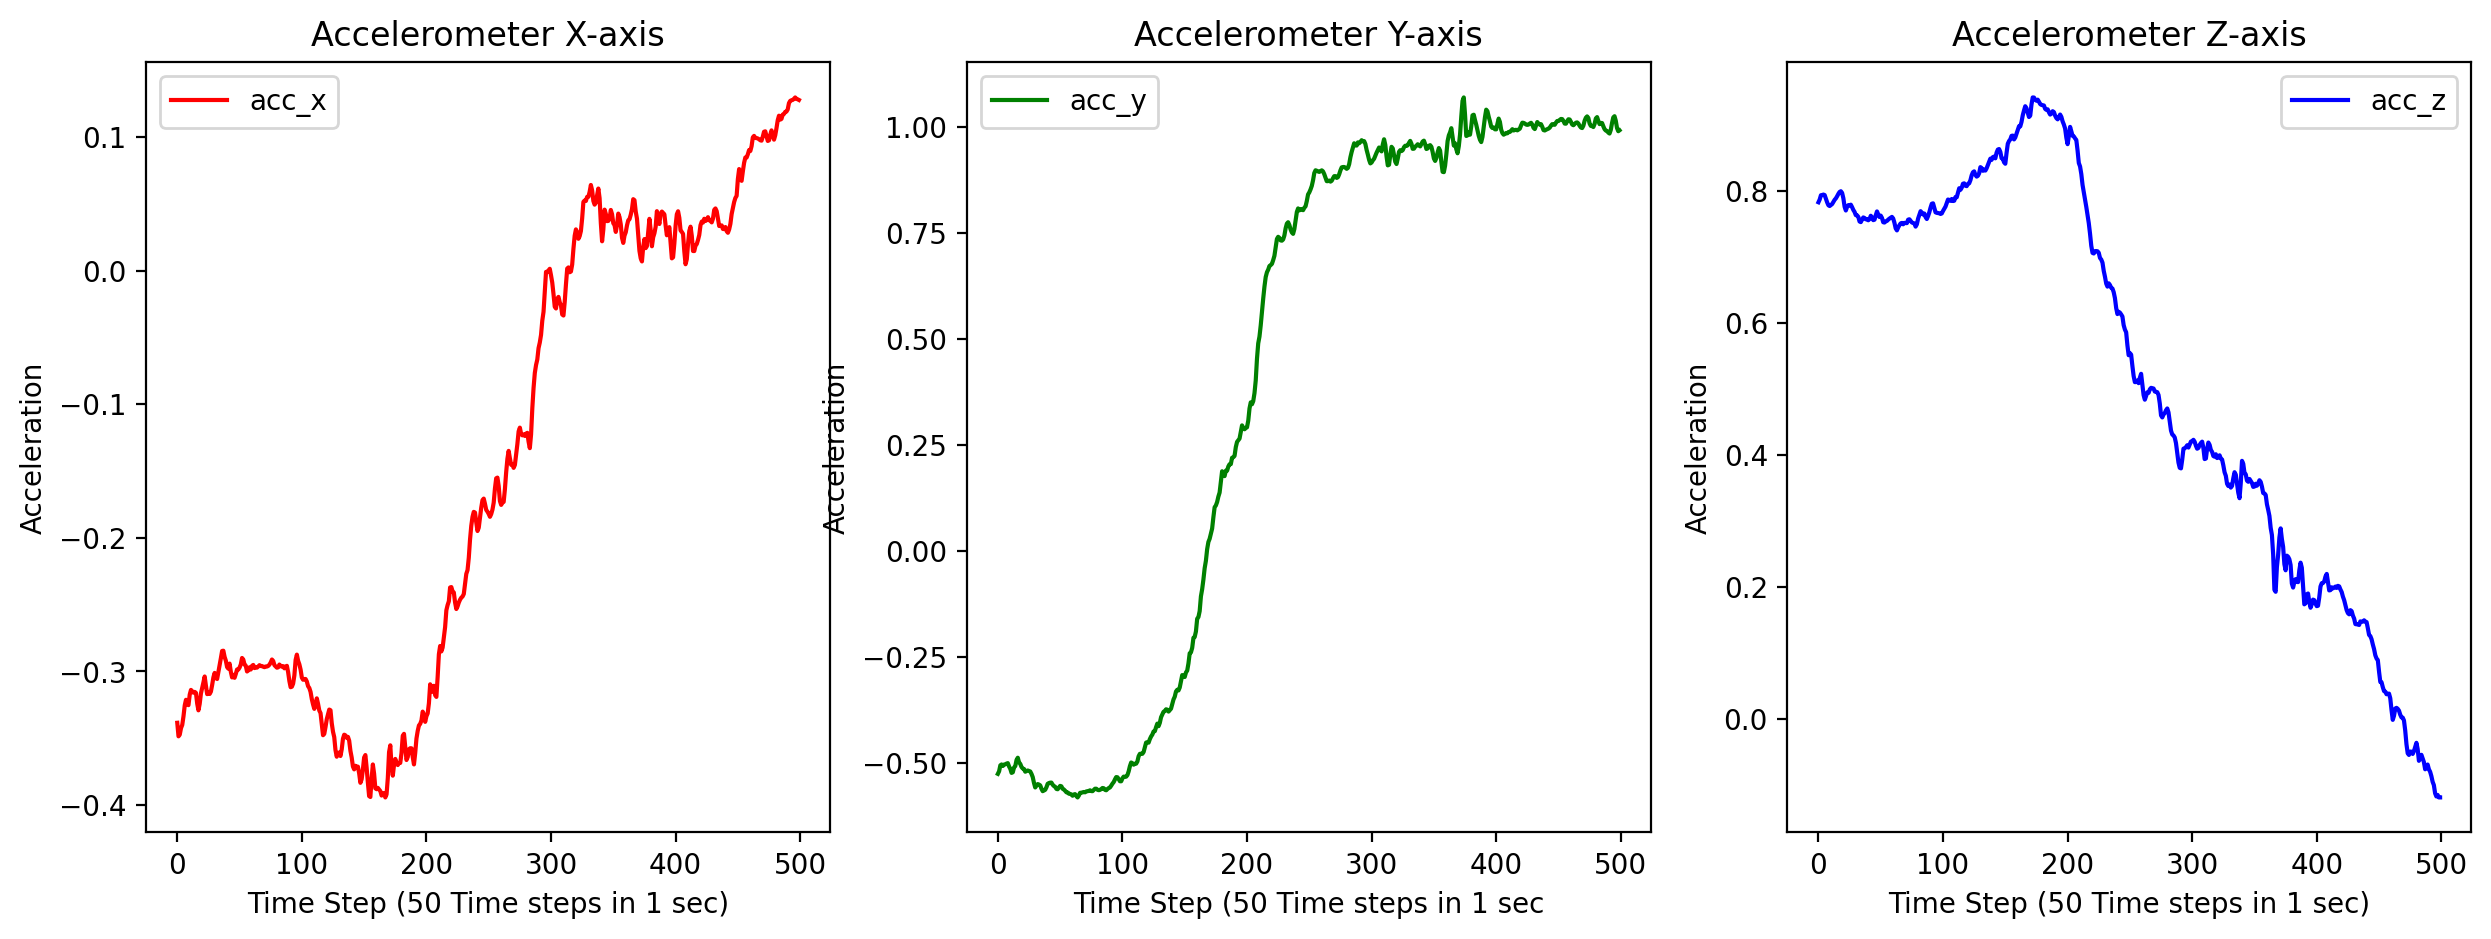

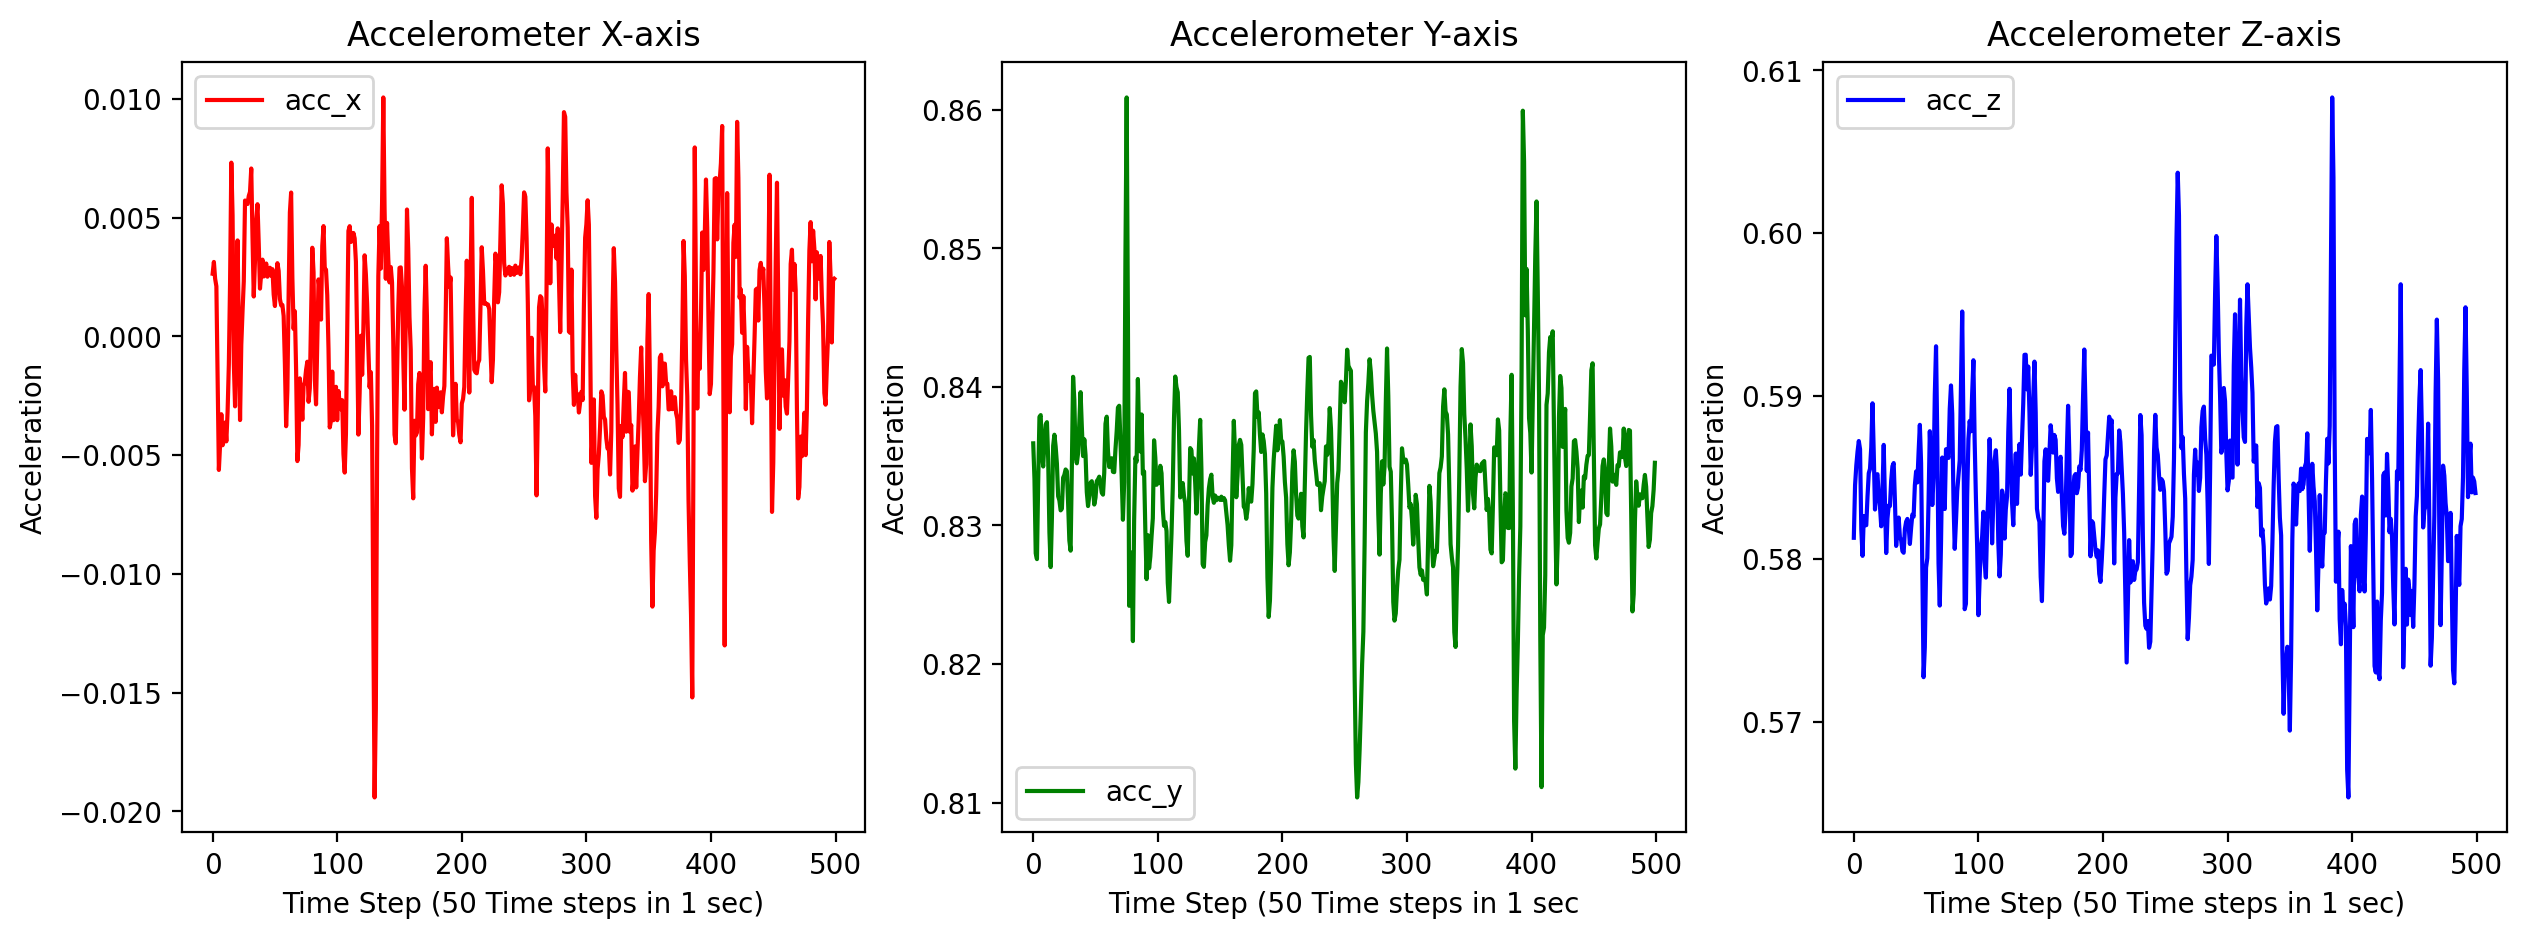

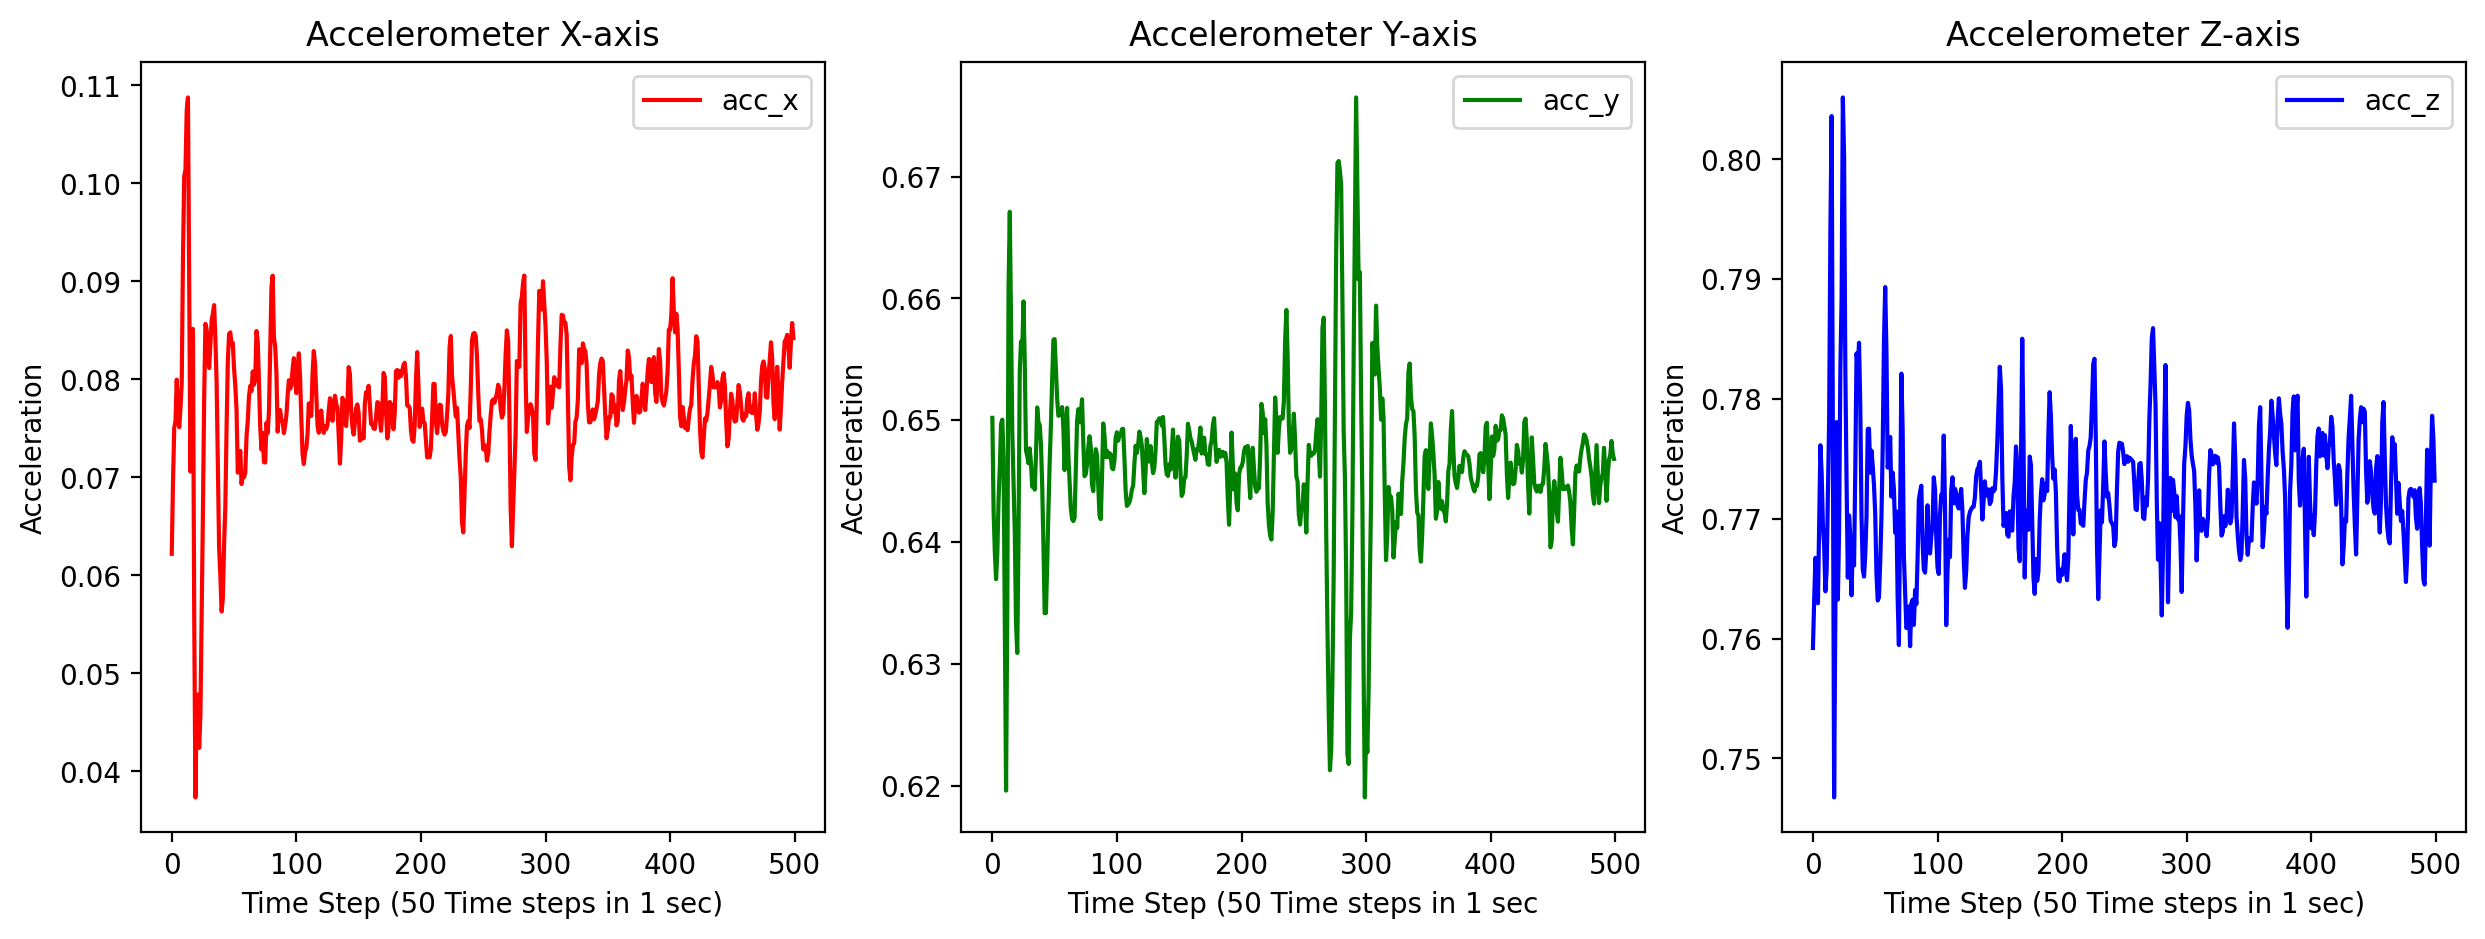

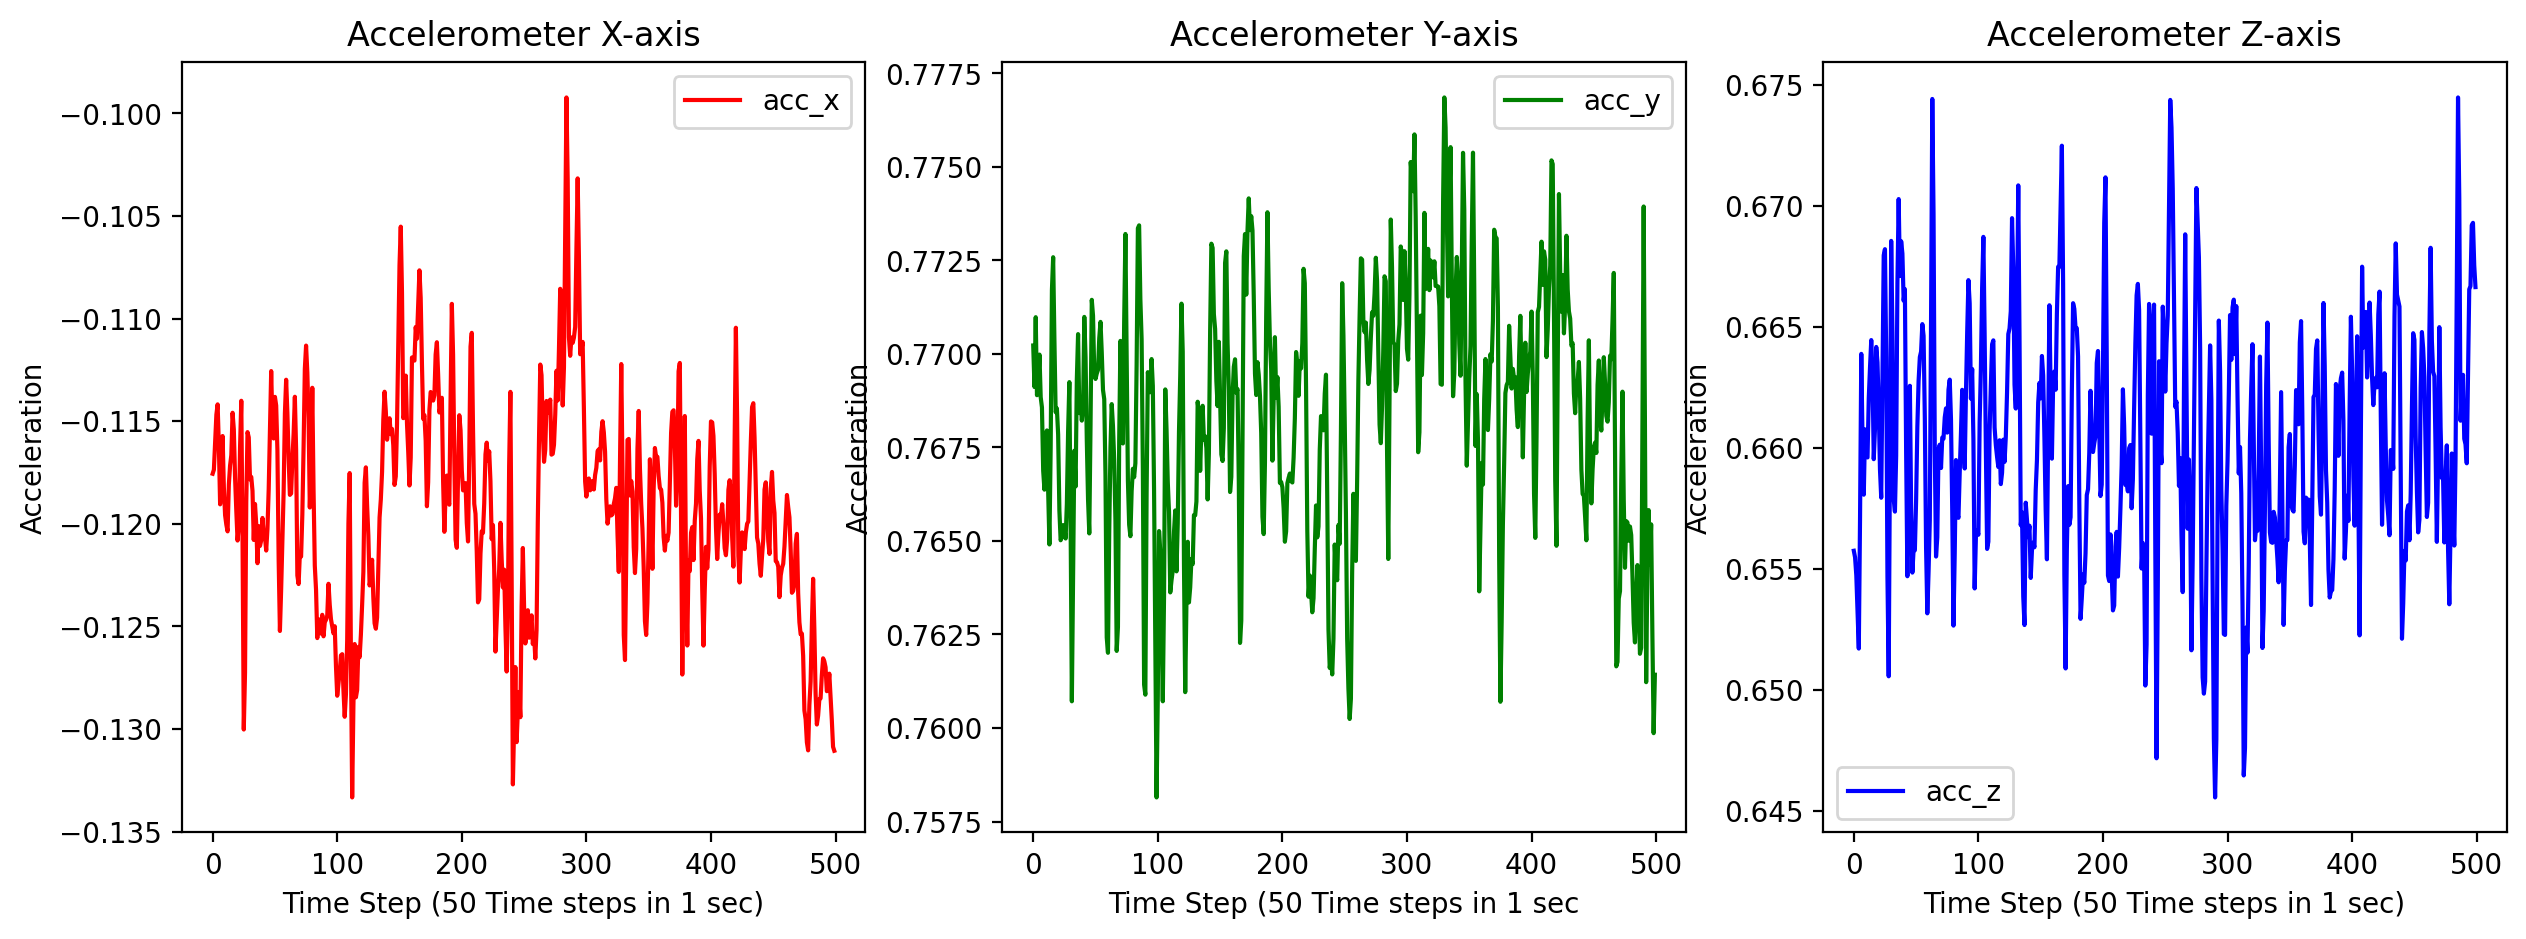

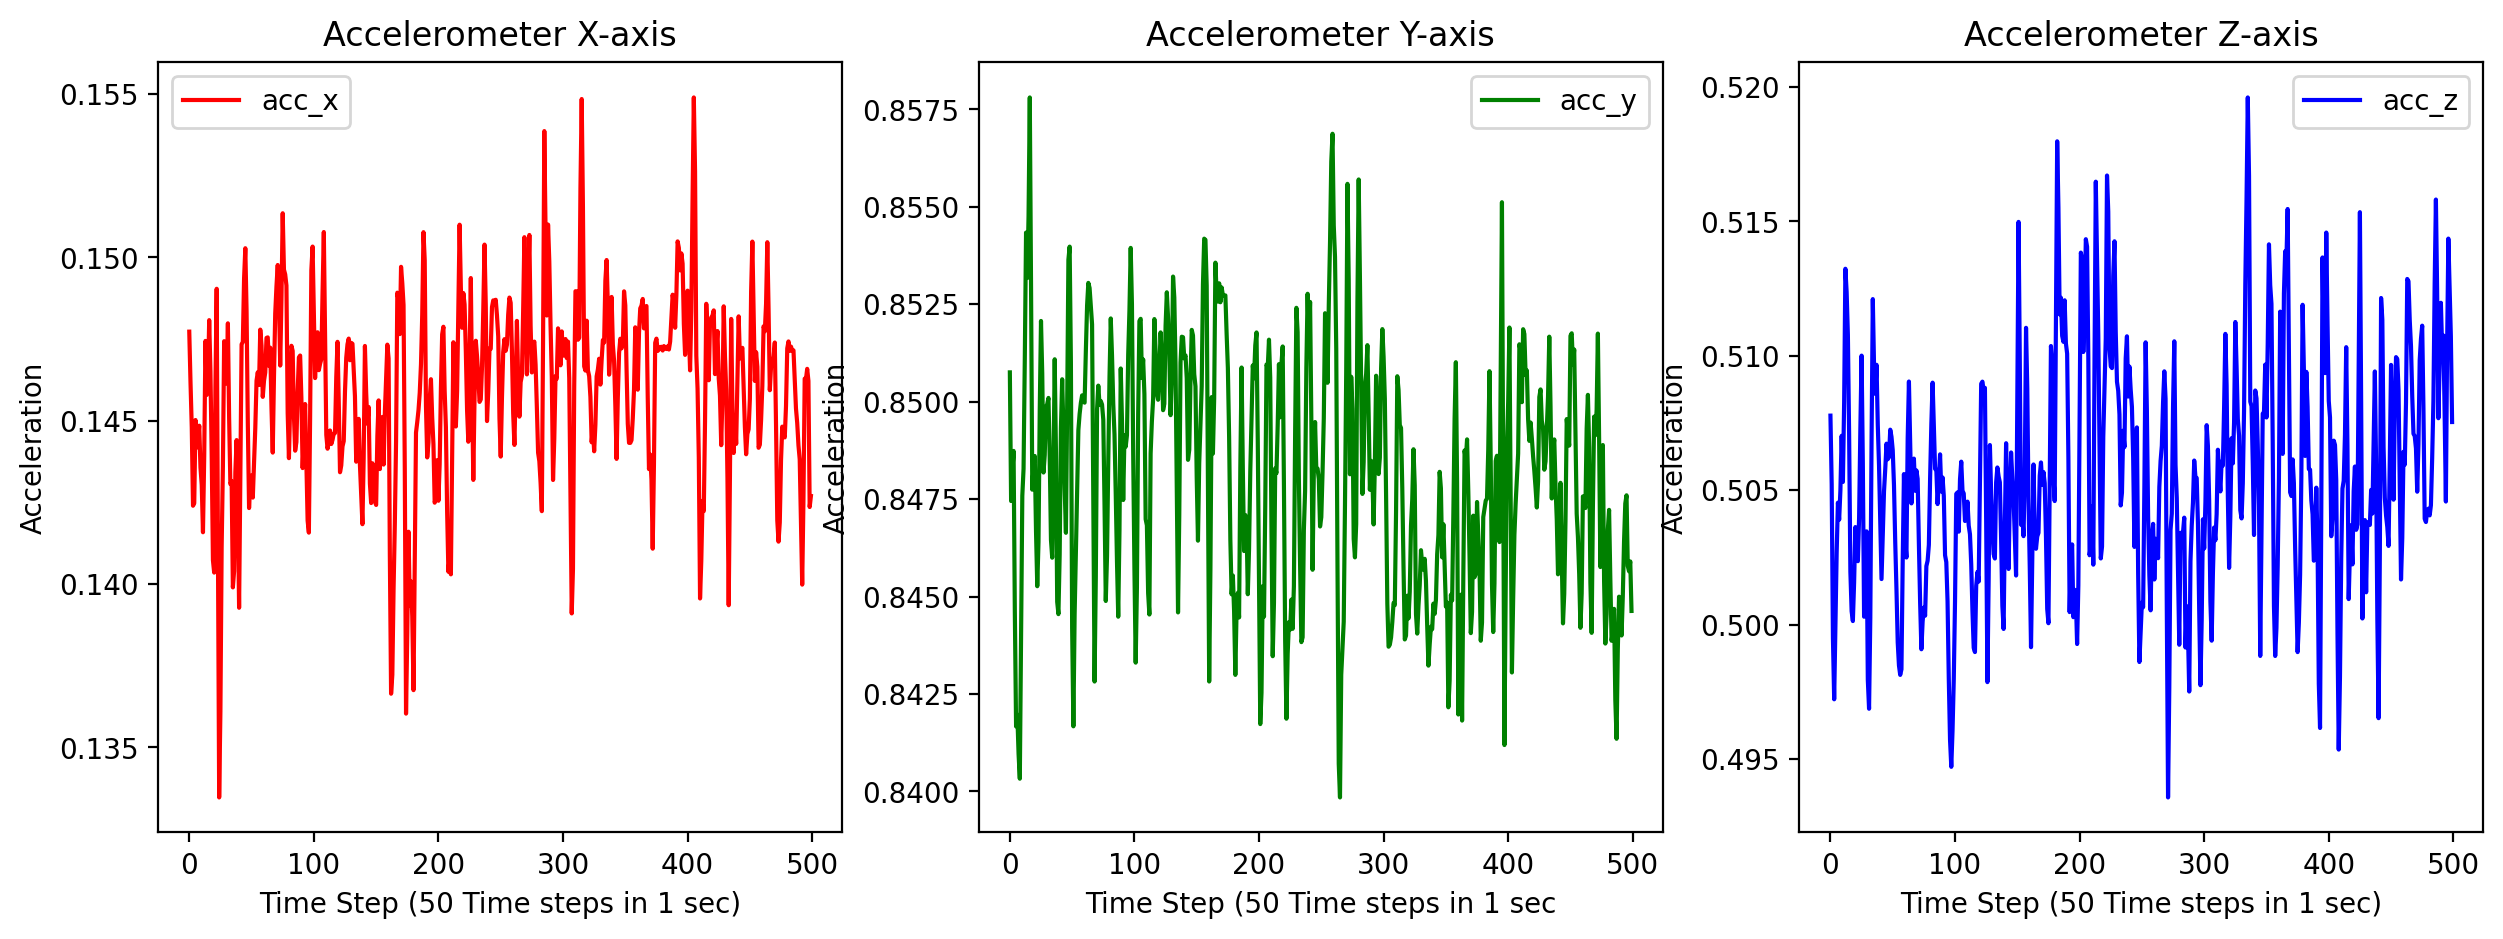

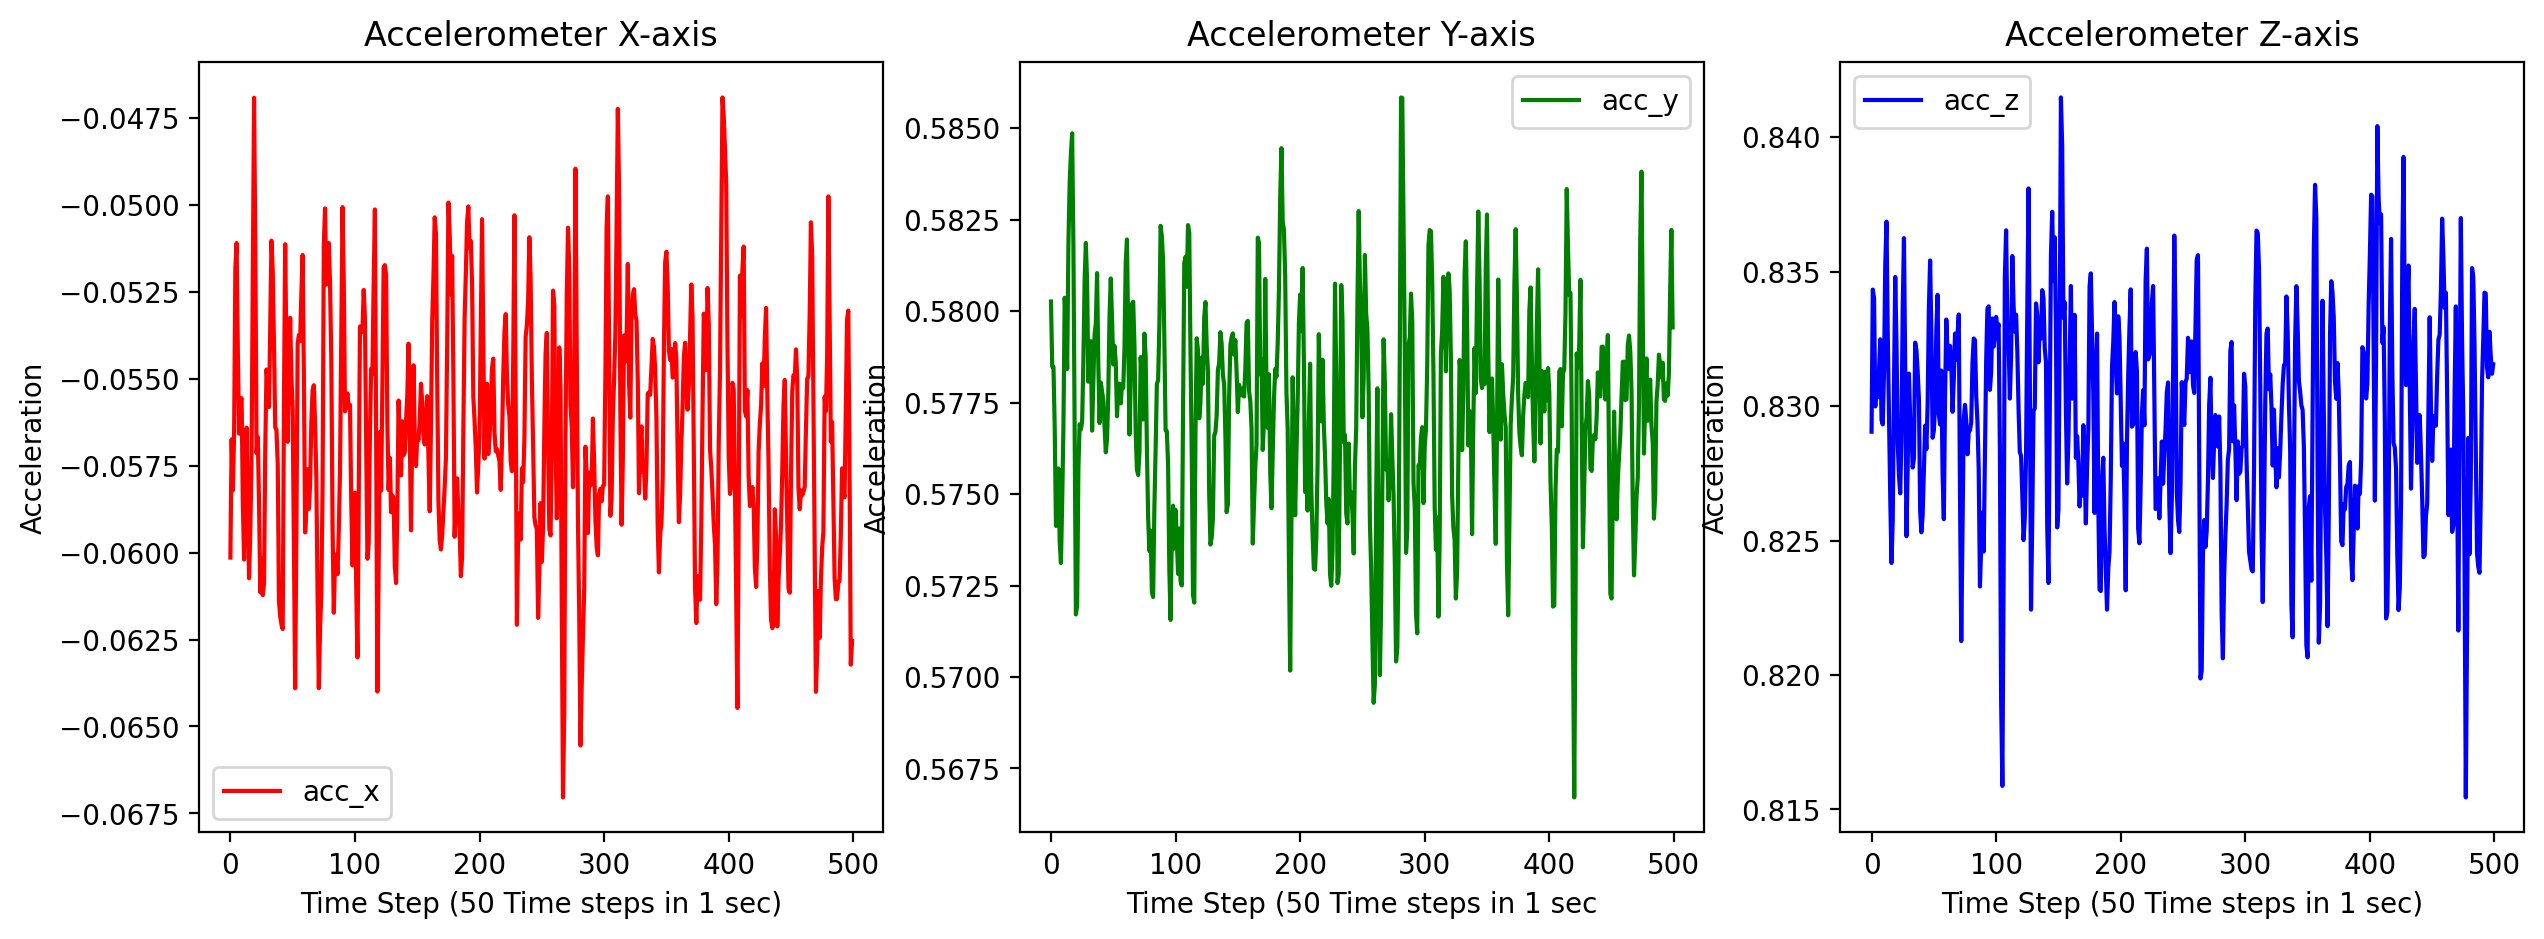

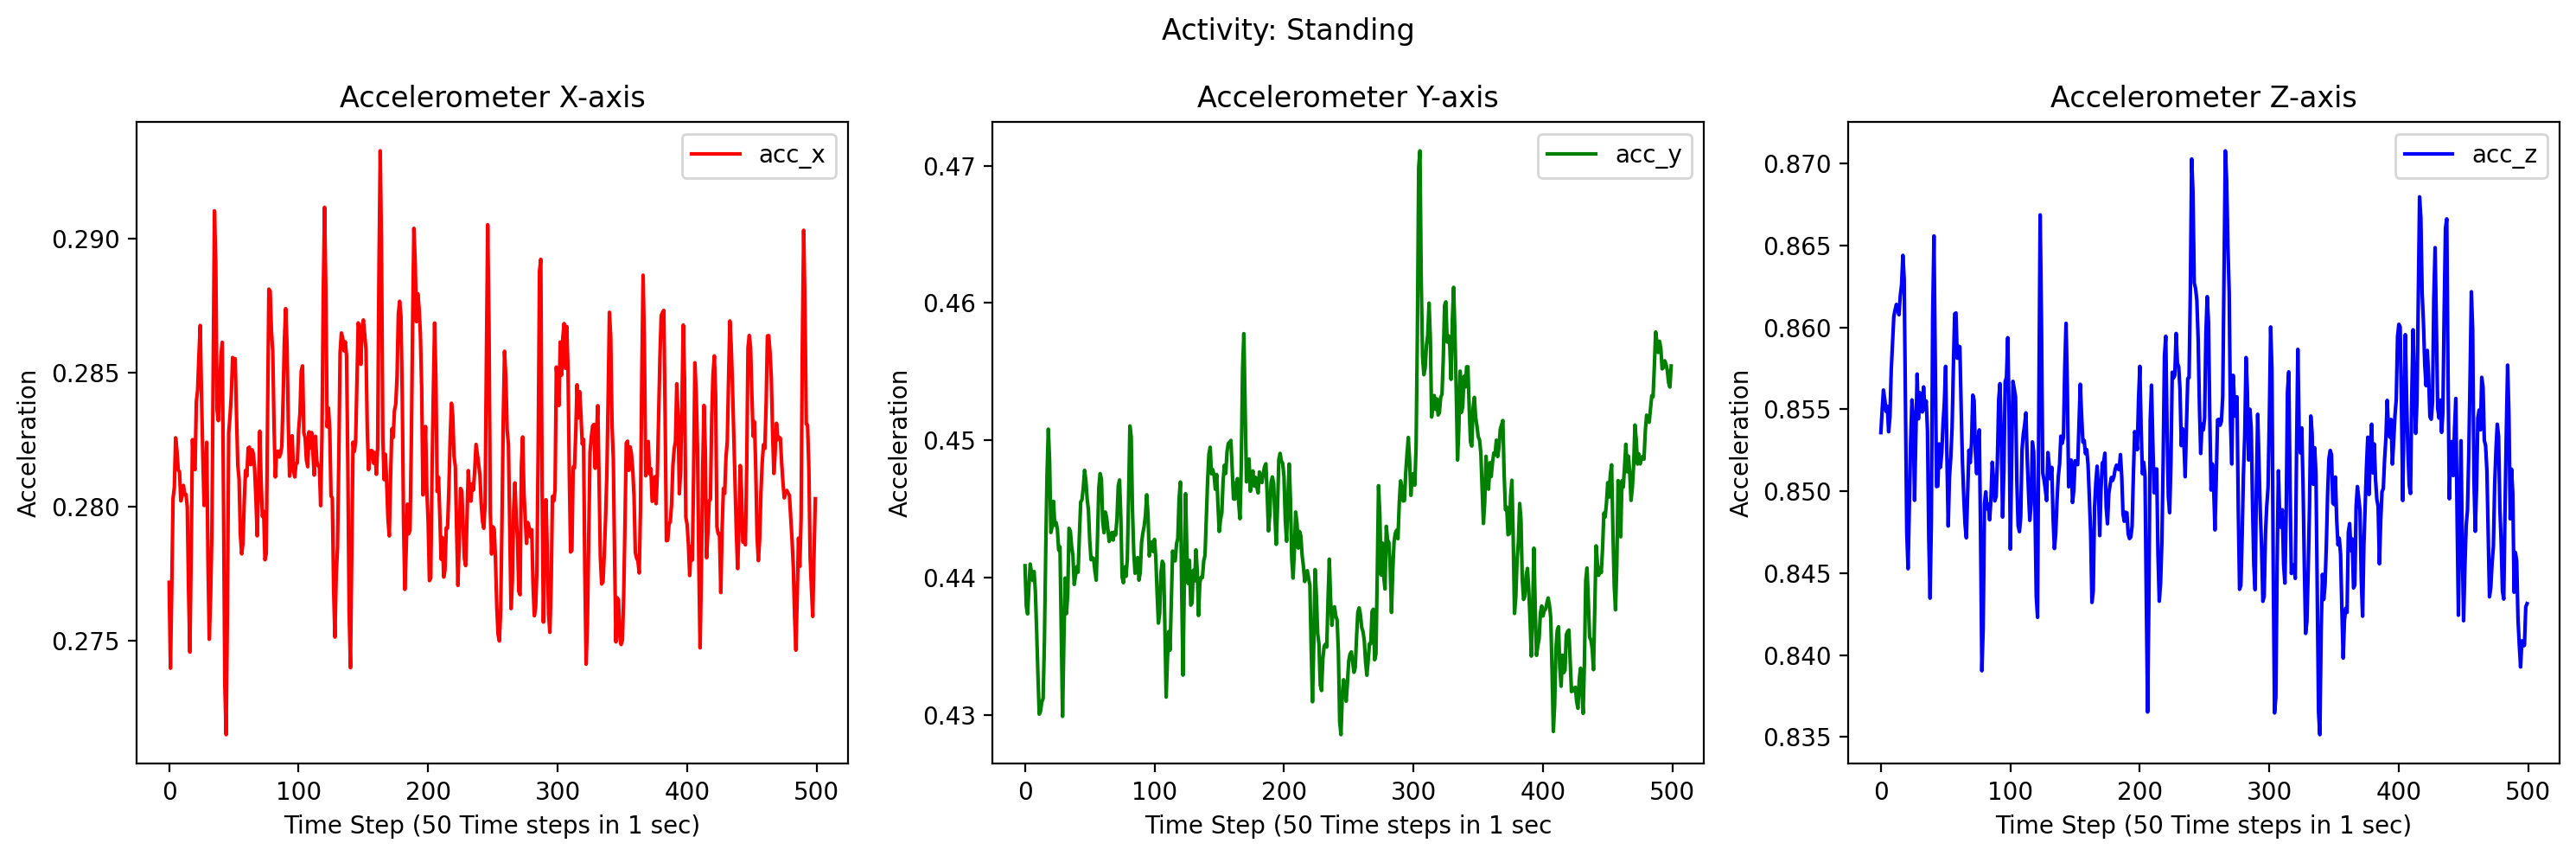

In [68]:
##Plot the data for a Random Sample
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

activities = [k for k, v in classes.items()]
standing = np.where(y_train == 5)[0] # 5 label for standing
print(standing)
random_samples_by_activities = X_train[standing[0:10]]
# print("Sample_Point:", random_sample)s

for random_sample in range(len(random_samples_by_activities)):
    random_sample_data = X[random_sample]
    random_sample_label = "Standing"
    print(y[random_sample], random_sample_label)
    acc_x = random_sample_data[:,0]
    acc_y = random_sample_data[:,1]
    acc_z = random_sample_data[:,2]

    #Random subject sampling 
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(acc_x, label='acc_x', color='r')
    plt.title('Accelerometer X-axis')
    plt.xlabel('Time Step (50 Time steps in 1 sec)')
    plt.ylabel('Acceleration')
    plt.legend()

    # Plot acc_y
    plt.subplot(1, 3, 2)
    plt.plot(acc_y, label='acc_y', color='g')
    plt.title('Accelerometer Y-axis')
    plt.xlabel('Time Step (50 Time steps in 1 sec')
    plt.ylabel('Acceleration')
    plt.legend()

    # Plot acc_z
    plt.subplot(1, 3, 3)
    plt.plot(acc_z, label='acc_z', color='b')
    plt.title('Accelerometer Z-axis')
    plt.xlabel('Time Step (50 Time steps in 1 sec)')
    plt.ylabel('Acceleration')
    plt.legend()


plt.suptitle(f"Activity: {random_sample_label}")
plt.tight_layout()
plt.show()


/var/folders/4k/xxxy9tg127s6hyrvg1srwct00000gn/T/ipykernel_97086/3524365162.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(acc_x**2 + acc_y**2 + acc_z**3)


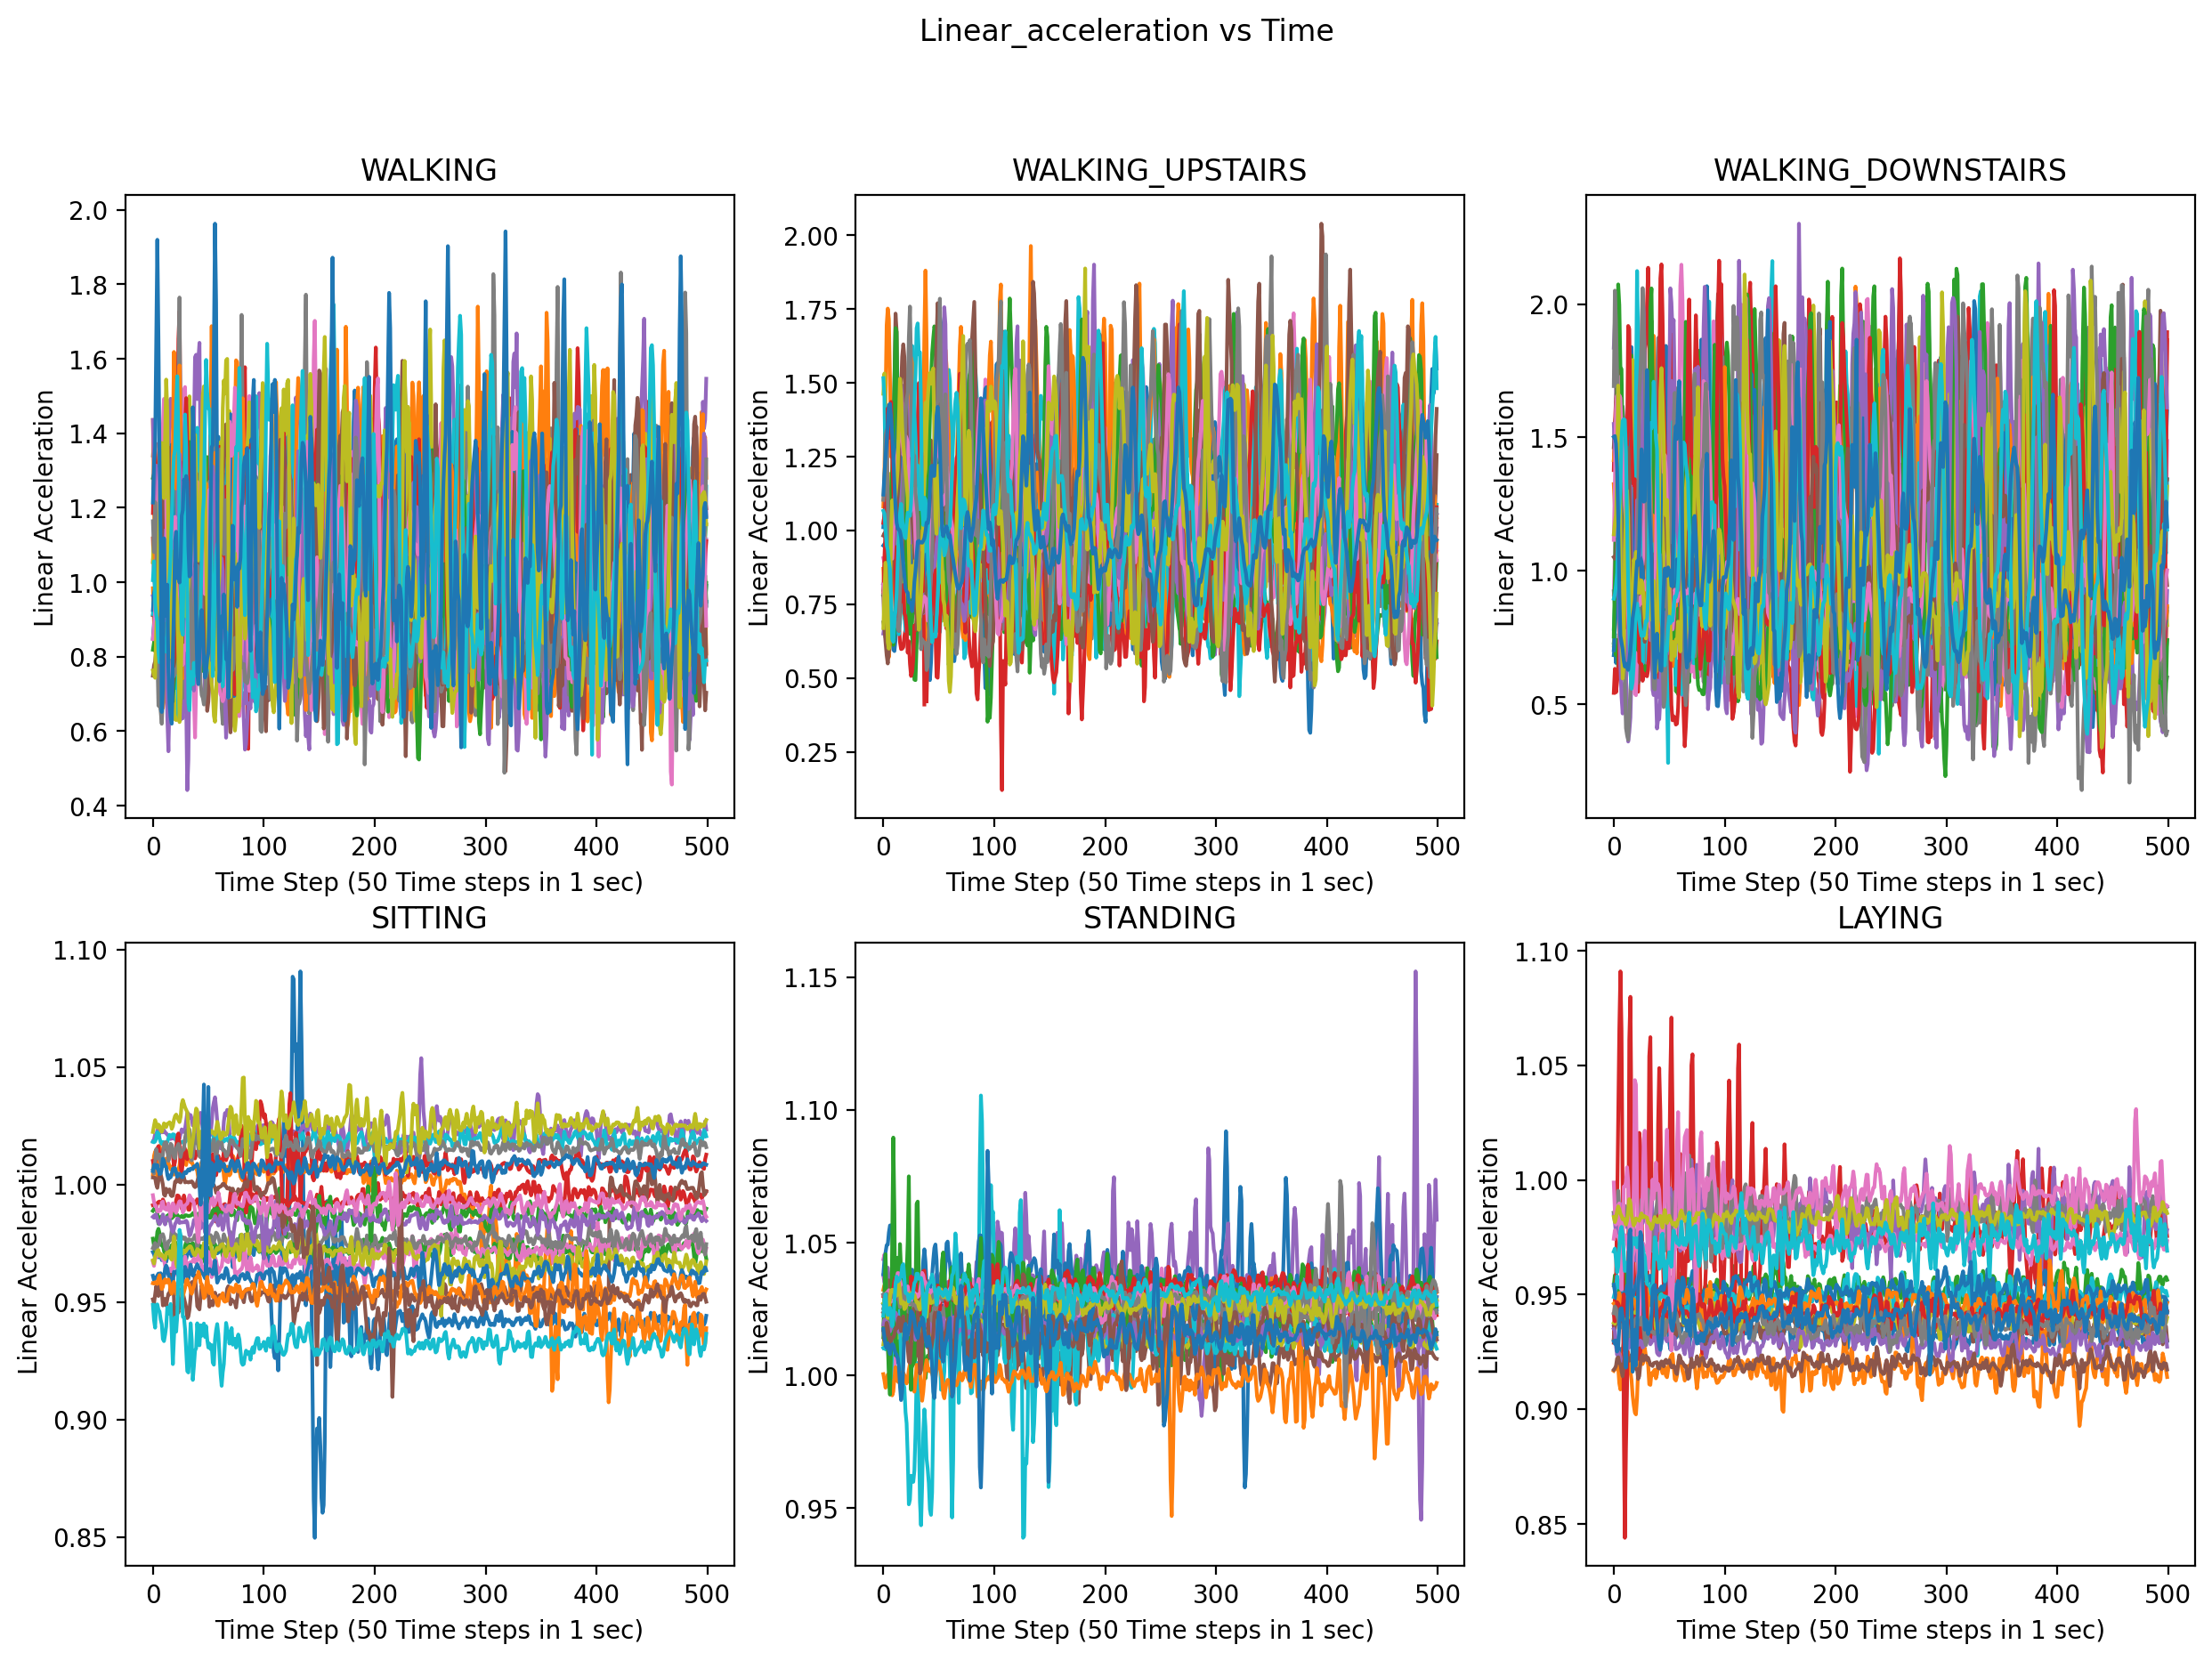

In [46]:
def calculate_lin_acceleration(acc_x, acc_y, acc_z):
    return np.sqrt(acc_x**2 + acc_y**2 + acc_z**3)

def linear_acc(data, label):
    activities = [k for k, v in classes.items()]
    activity_label = list(range(1, len(activities) + 1))
    plt.figure(figsize=(15, 10))
    plt.suptitle("Linear_acceleration vs Time")
    for i in range(len(data)):
        subject_activity_data = data[i]
        subject_activity_label = label[i]
        acc_x = subject_activity_data[:,0]
        acc_y = subject_activity_data[:,1]
        acc_z = subject_activity_data[:,2]
        linear_acceleration = calculate_lin_acceleration(acc_x, acc_y, acc_z)
        plt.subplot(2, 3, subject_activity_label)
        plt.title(activities[subject_activity_label-1])
        plt.plot(linear_acceleration, label=f'Subject_{i}')
        plt.xlabel('Time Step (50 Time steps in 1 sec)')
        plt.ylabel('Linear Acceleration')
        # plt.legend()
    plt.show()

linear_acc(X_train, y_train)

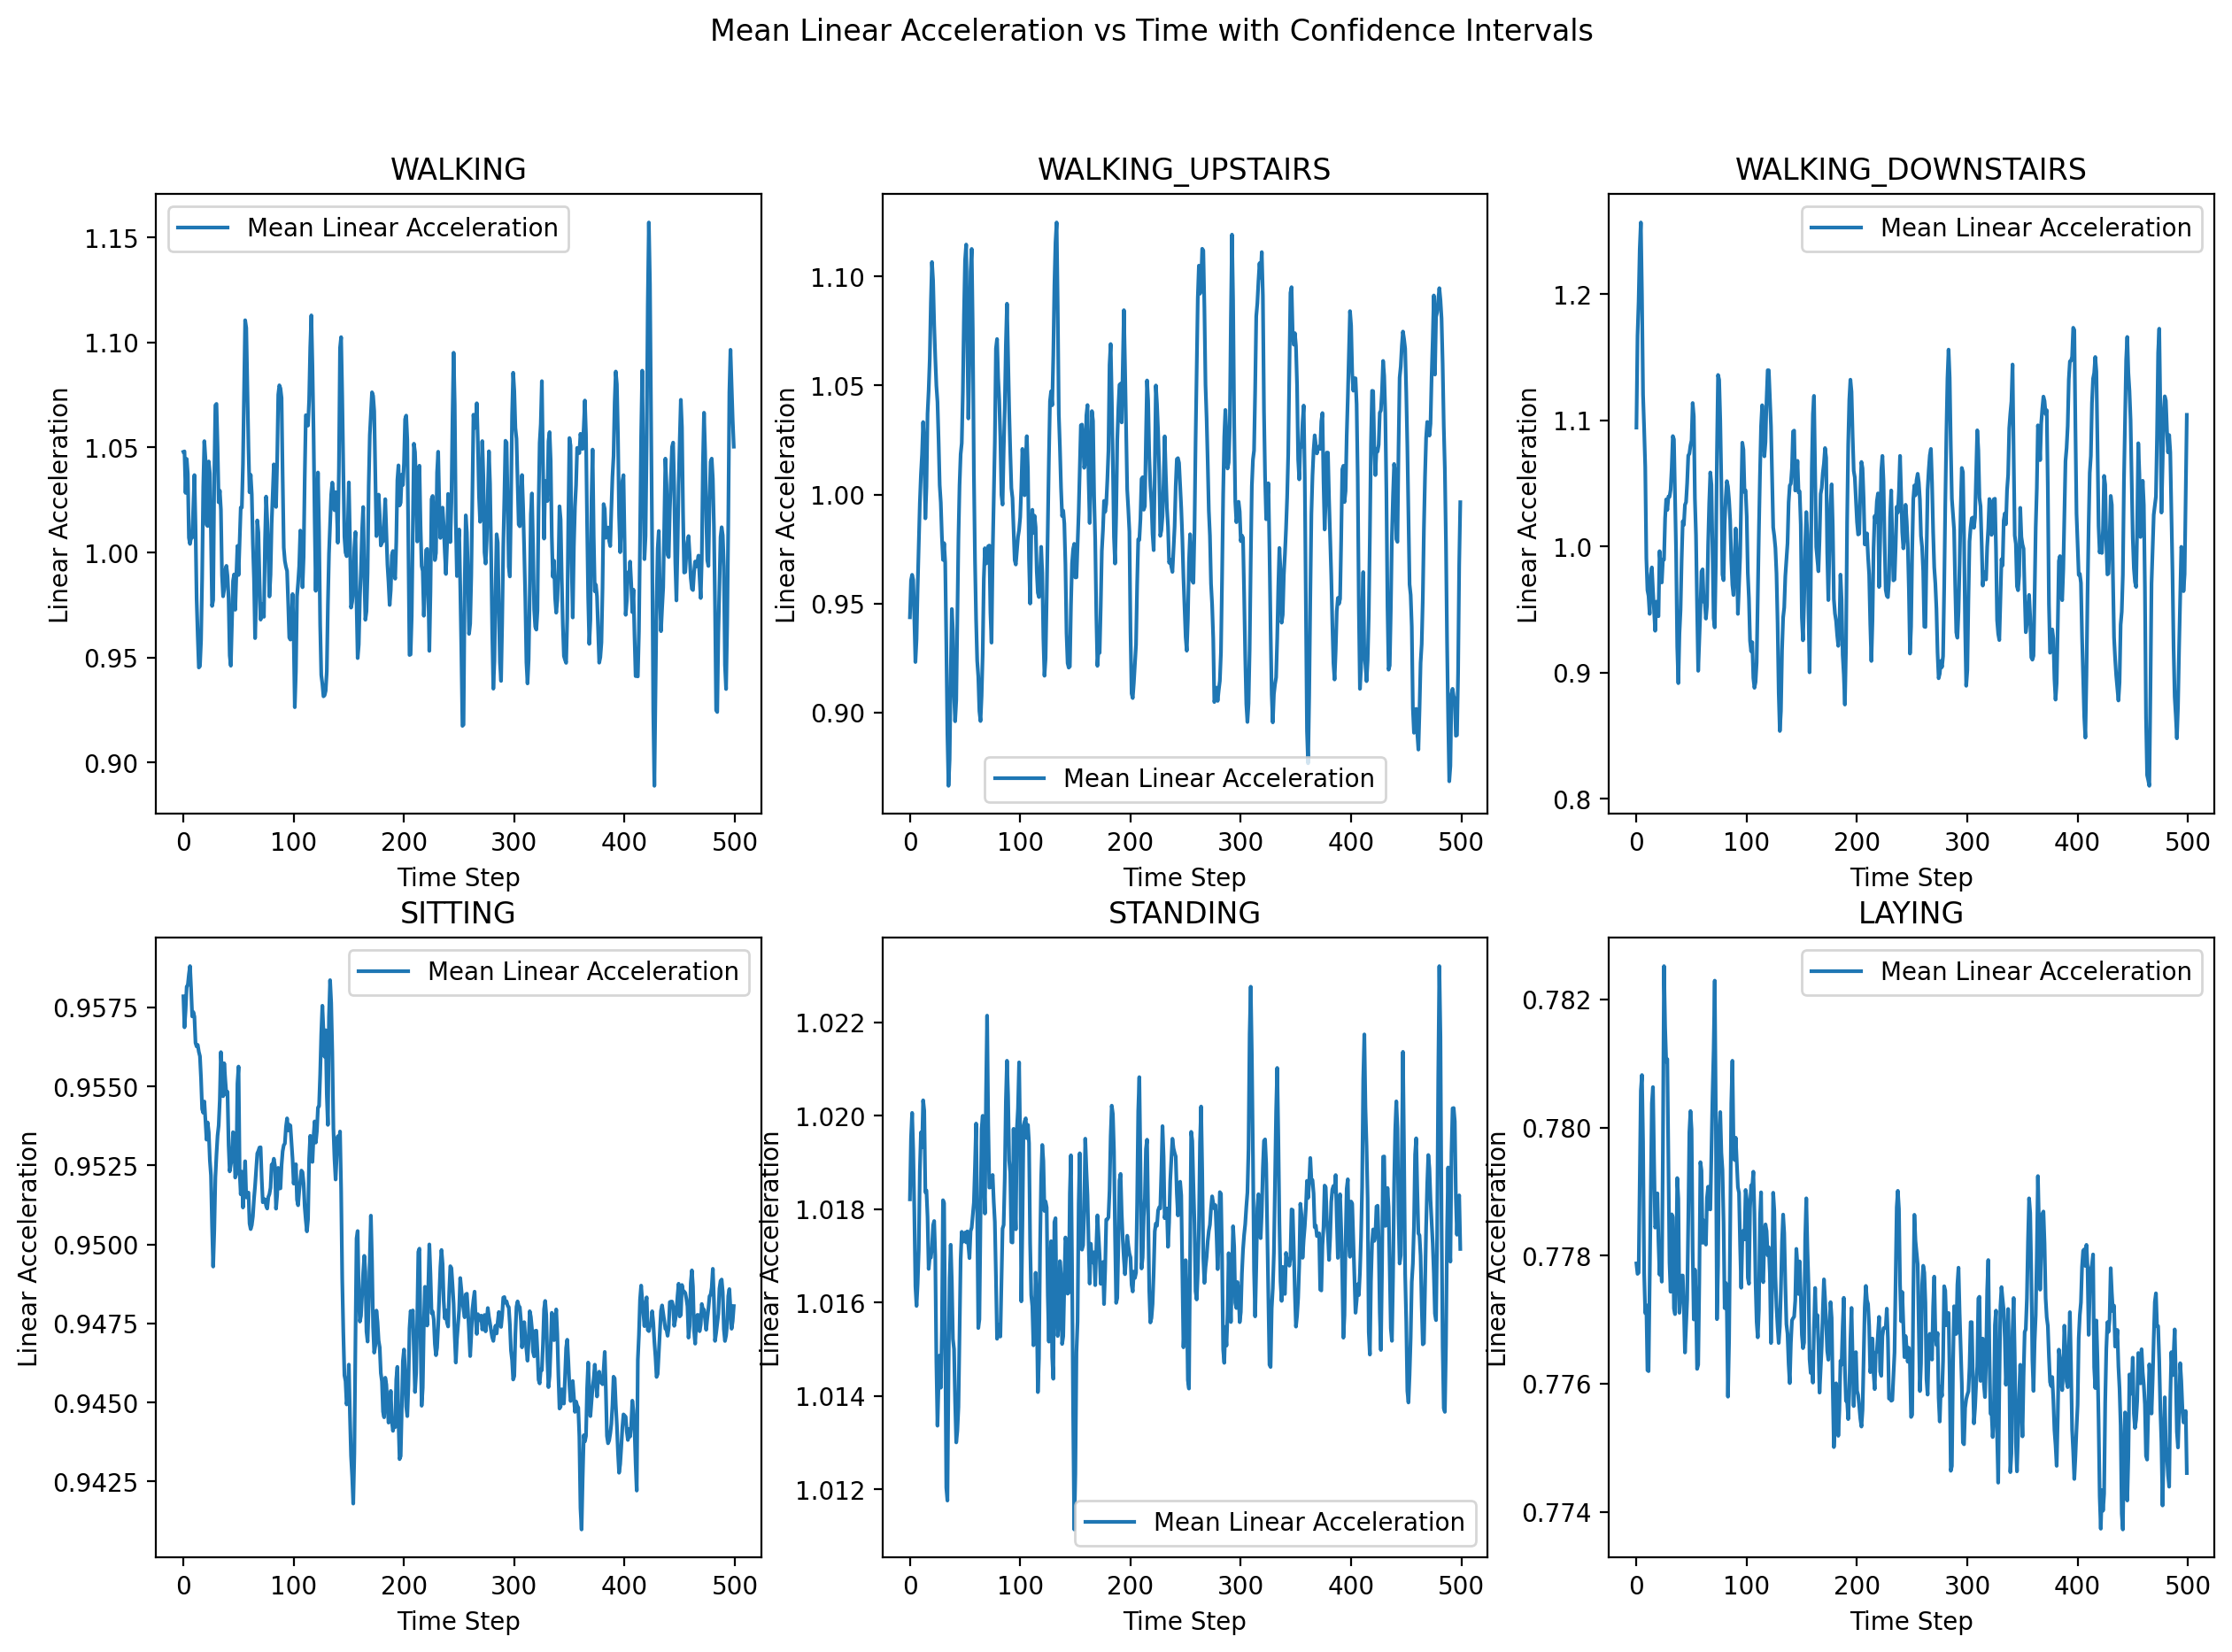

In [60]:
def plot_mean_with_confidence_intervals(data, label):
    activities = [k for k, v in classes.items()]
    plt.figure(figsize=(15, 10))
    plt.suptitle("Mean Linear Acceleration vs Time with Confidence Intervals")
    
    for i in range(1, len(activities) + 1):
        activity_data = data[label == i]
        mean_acc = np.mean(activity_data, axis=0)
        time_steps = np.arange(mean_acc.shape[0])
        mean_lin_acc = calculate_lin_acceleration(mean_acc[:, 0], mean_acc[:, 1], mean_acc[:, 2])
        std_acc = np.std(mean_lin_acc, axis=0)

        plt.subplot(2, 3, i)
        plt.title(activities[i-1])
        plt.plot(time_steps, mean_lin_acc, label='Mean Linear Acceleration')
        # plt.fill_between(time_steps, mean_lin_acc - std_acc, mean_lin_acc + std_acc, alpha=0.3)
        plt.xlabel('Time Step')
        plt.ylabel('Linear Acceleration')
        plt.legend()

    plt.show()


plot_mean_with_confidence_intervals(X_train, y_train)


In [71]:
y_train[24]

5